In [1]:
# 학습 데이터가 10일일 필요가 있을까? 5~ 20 variation을 해보자
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os
import seaborn as sns
import tensorflow as tf

In [290]:
# # 파일 불러오기
# def get_files(path):
#     for file in os.listdir(path):
#         if os.path.isfile(os.path.join(path, file)):
#             yield file

# org_list = []

# file_path = r'E:\Data_warehouse\contest_data'

# for file in get_files(file_path):
#     org_list.append(file)

# len(org_list)

15

In [291]:
# org_data = []

# for index, file in enumerate(org_list):
#     temp_path = file_path + '\{}'.format(file)
#     temp_csv = pd.read_csv(temp_path)
    
#     columns = [('org_{}'.format(index + 1), col) for col in temp_csv.columns]
#     temp_csv.columns = pd.MultiIndex.from_tuples(columns)

#     org_data.append(temp_csv)

In [9]:
org_list = []

for i in range(15):
    temp_df = pd.read_csv(f"E:\Data_warehouse\contest_data/org_{i+1}.csv")
    columns = [('org_{}'.format(i + 1), col) for col in temp_df.columns]
    temp_df.columns = pd.MultiIndex.from_tuples(columns)
    org_list.append(temp_df)

df = pd.concat(org_list, axis=1)
df.head()

org_1                                                       org_2  \
       Open      High       Low     Close Adj Close    Volume      Open   
0  0.027880  0.025988  0.033659  0.024765  0.021545  0.245573  0.266589   
1  0.020443  0.018876  0.021268  0.014612  0.016912  0.307382  0.261084   
2  0.019211  0.016421  0.019683  0.022698  0.013176  0.281341  0.265616   
3  0.023440  0.021740  0.022906  0.015337  0.020541  0.241052  0.248438   
4  0.020253  0.008166  0.021183  0.022217  0.020330  0.221884  0.248909   

                                 ...    org_14                                \
       High       Low     Close  ...       Low     Close Adj Close    Volume   
0  0.263898  0.264672  0.268466  ...  0.020003  0.025331  0.011525  0.058401   
1  0.259461  0.265566  0.263782  ...  0.017098  0.022291  0.024018  0.075992   
2  0.252503  0.262245  0.260986  ...  0.015233  0.025093  0.034806  0.039142   
3  0.241890  0.257117  0.255304  ...  0.019995  0.024737  0.015329  0.106943   
4  0.243336  0.258541  0.258958  ...  0.012984  0.011586  0.014383  0.072905   

     org_15                                                    
       Open      High       Low     Close Adj Close    Volume  
0  0.074474  0.074210  0.072215  0.073470  0.077259  0.032320  
1  0.075469  0.083429  0.078270  0.080847  0.080598  0.088032  
2  0.081649  0.092828  0.084078  0.081144  0.089813  0.053054  
3  0.080286  0.079525  0.080378  0.081369  0.074506  0.024202  
4  0.079822  0.084884  0.084061  0.087300  0.082363  0.026316  

[5 rows x 90 columns]

In [11]:
level1_columns = []

for i in df.columns:
    if i[1] == 'Close':
        level1_columns.append(i[0])

In [12]:
close_list = []
for i in level1_columns:
    temp = df[i]['Close']
    close_list.append(temp)

In [13]:
close_df = pd.concat(close_list, axis=1)
close_df.columns = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
close_df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.024765,0.268466,0.044988,0.076462,0.093320,0.090580,0.066961,0.164863,0.243010,0.014900,0.307956,0.059790,0.101765,0.025331,0.073470
1,0.014612,0.263782,0.049491,0.077544,0.089338,0.084212,0.054854,0.153625,0.250339,0.020742,0.309212,0.057951,0.129650,0.022291,0.080847
2,0.022698,0.260986,0.041077,0.080165,0.091000,0.085170,0.063562,0.146338,0.256932,0.023430,0.305090,0.044709,0.121993,0.025093,0.081144
3,0.015337,0.255304,0.042121,0.070439,0.080492,0.083499,0.041312,0.142313,0.246807,0.014417,0.312493,0.046948,0.107410,0.024737,0.081369
4,0.022217,0.258958,0.047204,0.082915,0.079745,0.086698,0.054388,0.146426,0.254971,0.028746,0.318296,0.053508,0.114772,0.011586,0.087300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259,0.589238,0.482530,0.432823,0.663816,0.714548,0.768056,0.701636,0.462637,0.141198,0.846167,0.741896,0.480084,0.429267,0.464961,0.474561
2260,0.635360,0.525454,0.449543,0.725548,0.775677,0.832226,0.743948,0.473708,0.147293,0.889611,0.811480,0.524995,0.452009,0.493504,0.513696
2261,0.628982,0.515033,0.440554,0.729721,0.783930,0.843107,0.732391,0.485511,0.161403,0.910775,0.824090,0.526767,0.477897,0.521021,0.544717
2262,0.632841,0.524988,0.450117,0.740068,0.771690,0.833454,0.750236,0.493641,0.152784,0.903643,0.814073,0.535348,0.462789,0.502720,0.571648


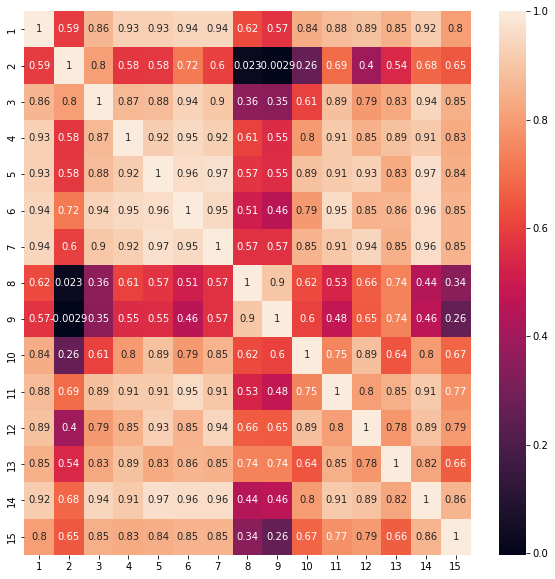

In [14]:
crr = close_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(crr, annot=True)
plt.show()

In [15]:
close_df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.024765,0.268466,0.044988,0.076462,0.093320,0.090580,0.066961,0.164863,0.243010,0.014900,0.307956,0.059790,0.101765,0.025331,0.073470
1,0.014612,0.263782,0.049491,0.077544,0.089338,0.084212,0.054854,0.153625,0.250339,0.020742,0.309212,0.057951,0.129650,0.022291,0.080847
2,0.022698,0.260986,0.041077,0.080165,0.091000,0.085170,0.063562,0.146338,0.256932,0.023430,0.305090,0.044709,0.121993,0.025093,0.081144
3,0.015337,0.255304,0.042121,0.070439,0.080492,0.083499,0.041312,0.142313,0.246807,0.014417,0.312493,0.046948,0.107410,0.024737,0.081369
4,0.022217,0.258958,0.047204,0.082915,0.079745,0.086698,0.054388,0.146426,0.254971,0.028746,0.318296,0.053508,0.114772,0.011586,0.087300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259,0.589238,0.482530,0.432823,0.663816,0.714548,0.768056,0.701636,0.462637,0.141198,0.846167,0.741896,0.480084,0.429267,0.464961,0.474561
2260,0.635360,0.525454,0.449543,0.725548,0.775677,0.832226,0.743948,0.473708,0.147293,0.889611,0.811480,0.524995,0.452009,0.493504,0.513696
2261,0.628982,0.515033,0.440554,0.729721,0.783930,0.843107,0.732391,0.485511,0.161403,0.910775,0.824090,0.526767,0.477897,0.521021,0.544717
2262,0.632841,0.524988,0.450117,0.740068,0.771690,0.833454,0.750236,0.493641,0.152784,0.903643,0.814073,0.535348,0.462789,0.502720,0.571648


In [19]:
data = close_df.values
data.shape

(2264, 15)

In [20]:
def create_dataset_tot(dataset, time_step=1, test_size_num=10):
    train_size = int(dataset.shape[0] - test_size_num)

    data_train = dataset[0:train_size, :]
    data_test = dataset[train_size:int(data.shape[0]), :] 

    dataX, dataY = [], []
    for i in range(data_train.shape[0] - time_step + 1):
        a = dataset[i:(i+time_step)]
        dataX.append(a)
        dataY.append(dataset[i + time_step])

    return np.array(dataX), np.array(dataY), data_test

In [31]:
# data 분리 완료
x_data, y_data, test_data = create_dataset_tot(data, time_step=2, test_size_num=10)
data.shape, x_data.shape, y_data.shape, test_data.shape

((2264, 15), (2253, 2, 15), (2253, 15), (10, 15))

In [40]:
# create the stacked LSTM Model as df 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import LSTM, Dropout

def LSTM_Model(x, y, batch_size_num):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(x.shape[1], x.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    earlystopper = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1)
    history = model.fit(x, y, validation_split=0.2, epochs=100, batch_size=batch_size_num, verbose=1, callbacks=[earlystopper]) 
    
    return (model, history)

In [46]:
model_list = []
history_list = []

batch_size_num = 128

for i in range(15):
    model_history = LSTM_Model(x_data, y_data[:, i], batch_size_num)
    model_list.append(model_history[0])
    history_list.append(model_history[1])

Epoch 1/100
15/15 [==============================] - 4s 63ms/step - loss: 0.0563 - val_loss: 0.1542
Epoch 2/100
15/15 [==============================] - 0s 9ms/step - loss: 0.0109 - val_loss: 0.0487
Epoch 3/100
15/15 [==============================] - 0s 9ms/step - loss: 0.0074 - val_loss: 0.0466
Epoch 4/100
15/15 [==============================] - 0s 9ms/step - loss: 0.0055 - val_loss: 0.0266
Epoch 5/100
15/15 [==============================] - 0s 9ms/step - loss: 0.0045 - val_loss: 0.0123
Epoch 6/100
15/15 [==============================] - 0s 9ms/step - loss: 0.0040 - val_loss: 0.0093
Epoch 7/100
15/15 [==============================] - 0s 9ms/step - loss: 0.0037 - val_loss: 0.0107
Epoch 8/100
15/15 [==============================] - 0s 9ms/step - loss: 0.0036 - val_loss: 0.0174
Epoch 9/100
15/15 [==============================] - 0s 9ms/step - loss: 0.0033 - val_loss: 0.0248
Epoch 10/100
15/15 [==============================] - 0s 9ms/step - loss: 0.0030 - val_loss: 0.0258
Epoch 11

In [45]:
test = LSTM_Model(x_data, y_data[:, 0], 50)

Epoch 1/100
37/37 [==============================] - 4s 30ms/step - loss: 0.0288 - val_loss: 0.1000
Epoch 2/100
37/37 [==============================] - 0s 6ms/step - loss: 0.0054 - val_loss: 0.0150
Epoch 3/100
37/37 [==============================] - 0s 6ms/step - loss: 0.0036 - val_loss: 0.0154
Epoch 4/100
37/37 [==============================] - 0s 7ms/step - loss: 0.0030 - val_loss: 0.0179
Epoch 5/100
37/37 [==============================] - 0s 7ms/step - loss: 0.0026 - val_loss: 0.0350
Epoch 6/100
37/37 [==============================] - 0s 8ms/step - loss: 0.0021 - val_loss: 0.0512
Epoch 7/100
37/37 [==============================] - 0s 7ms/step - loss: 0.0017 - val_loss: 0.0445
Epoch 8/100
37/37 [==============================] - 0s 7ms/step - loss: 0.0012 - val_loss: 0.0535
Epoch 9/100
37/37 [==============================] - 0s 7ms/step - loss: 9.9157e-04 - val_loss: 0.0303
Epoch 10/100
37/37 [==============================] - 0s 7ms/step - loss: 9.0435e-04 - val_loss: 0.0199


In [42]:
x_testset_1 = x_data[-1].reshape(1, x_data.shape[1], x_data.shape[2])
x_testset_1

array([[[0.69936128, 0.5939875 , 0.50534533, 0.77354653, 0.80454163,
         0.93191996, 0.75651739, 0.5058813 , 0.18709383, 0.96043603,
         0.95287006, 0.55977263, 0.52696886, 0.52348118, 0.53808518],
        [0.67604614, 0.59447084, 0.49524699, 0.77073555, 0.77892428,
         0.88711887, 0.72985552, 0.49578815, 0.18865367, 0.93327191,
         0.90499322, 0.54816265, 0.50941213, 0.52163583, 0.52403702]]])

In [33]:
close_df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.024765,0.268466,0.044988,0.076462,0.093320,0.090580,0.066961,0.164863,0.243010,0.014900,0.307956,0.059790,0.101765,0.025331,0.073470
1,0.014612,0.263782,0.049491,0.077544,0.089338,0.084212,0.054854,0.153625,0.250339,0.020742,0.309212,0.057951,0.129650,0.022291,0.080847
2,0.022698,0.260986,0.041077,0.080165,0.091000,0.085170,0.063562,0.146338,0.256932,0.023430,0.305090,0.044709,0.121993,0.025093,0.081144
3,0.015337,0.255304,0.042121,0.070439,0.080492,0.083499,0.041312,0.142313,0.246807,0.014417,0.312493,0.046948,0.107410,0.024737,0.081369
4,0.022217,0.258958,0.047204,0.082915,0.079745,0.086698,0.054388,0.146426,0.254971,0.028746,0.318296,0.053508,0.114772,0.011586,0.087300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259,0.589238,0.482530,0.432823,0.663816,0.714548,0.768056,0.701636,0.462637,0.141198,0.846167,0.741896,0.480084,0.429267,0.464961,0.474561
2260,0.635360,0.525454,0.449543,0.725548,0.775677,0.832226,0.743948,0.473708,0.147293,0.889611,0.811480,0.524995,0.452009,0.493504,0.513696
2261,0.628982,0.515033,0.440554,0.729721,0.783930,0.843107,0.732391,0.485511,0.161403,0.910775,0.824090,0.526767,0.477897,0.521021,0.544717
2262,0.632841,0.524988,0.450117,0.740068,0.771690,0.833454,0.750236,0.493641,0.152784,0.903643,0.814073,0.535348,0.462789,0.502720,0.571648


In [28]:
model_list = [] 

for i in range(15):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [18]:

target = 'org_6'
target2 = 'org_14'
df_1 = df[target]
df_2 = df[target2]
df_2_value = df_2.filter(['Close']).values

data = df_1.filter(['Close']).values
data = np.hstack((data, df_2_value))
data.shape
# data.shape

(2264, 2)

In [299]:
data.shape

(2264, 2)

In [300]:
def create_dataset_3(dataset, time_step=1, test_size_num=10):
    train_size = int(dataset.shape[0] - test_size_num)

    data_train = dataset[0:train_size, :]
    data_test = dataset[train_size:int(data.shape[0]), :] 

    dataX, dataY = [], []
    for i in range(data_train.shape[0] - time_step + 1):
        a = dataset[i:(i+time_step)]
        dataX.append(a)
        dataY.append(dataset[i + time_step])

    return np.array(dataX), np.array(dataY), data_test

In [301]:
# data 분리 완료
x_data, y_data, test_data = create_dataset_3(data, time_step=2, test_size_num=10)
data.shape, x_data.shape, y_data.shape, test_data.shape

((2264, 2), (2253, 2, 2), (2253, 2), (10, 2))

In [302]:
x_data.ndim, y_data.ndim, test_data.ndim

(3, 2, 2)

In [303]:
y_data_1 = y_data[:,0]
y_data_2 = y_data[:,1]
y_data_1.shape, y_data_2.shape

((2253,), (2253,))

In [304]:
# create the stacked LSTM Model 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import LSTM, Dropout

# build the LSTM model 
model1 = Sequential()
model1.add(LSTM(50, return_sequences=True, input_shape=(x_data.shape[1], 2)))
model1.add(Dropout(0.2))
model1.add(LSTM(50, return_sequences=True))
model1.add(Dropout(0.2))
model1.add(LSTM(50))
model1.add(Dense(1))
model1.compile(loss='mean_squared_error', optimizer='adam')
model1.summary()

# build the LSTM model 
model2 = Sequential()
model2.add(LSTM(50, return_sequences=True, input_shape=(x_data.shape[1], 2)))
model2.add(Dropout(0.2))
model2.add(LSTM(50, return_sequences=True))
model2.add(LSTM(50, return_sequences=True, input_shape=(x_data.shape[1], 2)))
model2.add(Dropout(0.2))
model2.add(LSTM(50))
model2.add(Dense(1))
model2.compile(loss='mean_absolute_error', optimizer='adam')
model2.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_70 (LSTM)              (None, 2, 50)             10600     
                                                                 
 dropout_40 (Dropout)        (None, 2, 50)             0         
                                                                 
 lstm_71 (LSTM)              (None, 2, 50)             20200     
                                                                 
 dropout_41 (Dropout)        (None, 2, 50)             0         
                                                                 
 lstm_72 (LSTM)              (None, 50)                20200     
                                                                 
 dense_20 (Dense)            (None, 1)                 51        
                                                                 
Total params: 51,051
Trainable params: 51,051
Non-tra

In [305]:
# model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=10) 
# # verbose = 1 한 epoch 할때 마다 학습 내용을 print 해서 보여준다.

In [306]:
earlystopper = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1)

In [307]:
# model1 'close' fit 원래는 64
history1 = model1.fit(x_data, y_data_1, validation_split=0.2, epochs=100, batch_size=128, verbose=1, callbacks=[earlystopper]) # verbose = 1 한 epoch 할때 마다 학습 내용을 print 해서 보여준다.


Epoch 1/100
15/15 [==============================] - 4s 75ms/step - loss: 0.0292 - val_loss: 0.3782
Epoch 2/100
15/15 [==============================] - 0s 18ms/step - loss: 0.0164 - val_loss: 0.2575
Epoch 3/100
15/15 [==============================] - 0s 18ms/step - loss: 0.0130 - val_loss: 0.1942
Epoch 4/100
15/15 [==============================] - 0s 18ms/step - loss: 0.0071 - val_loss: 0.0264
Epoch 5/100
15/15 [==============================] - 0s 18ms/step - loss: 0.0017 - val_loss: 0.0505
Epoch 6/100
15/15 [==============================] - 0s 18ms/step - loss: 6.8162e-04 - val_loss: 0.0171
Epoch 7/100
15/15 [==============================] - 0s 18ms/step - loss: 6.1111e-04 - val_loss: 0.0167
Epoch 8/100
15/15 [==============================] - 0s 18ms/step - loss: 4.9127e-04 - val_loss: 0.0172
Epoch 9/100
15/15 [==============================] - 0s 18ms/step - loss: 4.4922e-04 - val_loss: 0.0105
Epoch 10/100
15/15 [==============================] - 0s 18ms/step - loss: 4.2197e-0

In [308]:
# model2 'volume' fit
history2 = model2.fit(x_data, y_data_2, validation_split=0.2, epochs=100, batch_size=128, verbose=1, callbacks=[earlystopper]) 


Epoch 1/100
15/15 [==============================] - 6s 93ms/step - loss: 0.3817 - val_loss: 0.5055
Epoch 2/100
15/15 [==============================] - 0s 23ms/step - loss: 0.2661 - val_loss: 0.1200
Epoch 3/100
15/15 [==============================] - 0s 23ms/step - loss: 0.1886 - val_loss: 0.0940
Epoch 4/100
15/15 [==============================] - 0s 23ms/step - loss: 0.1310 - val_loss: 0.1075
Epoch 5/100
15/15 [==============================] - 0s 23ms/step - loss: 0.0620 - val_loss: 0.1158
Epoch 6/100
15/15 [==============================] - 0s 23ms/step - loss: 0.0515 - val_loss: 0.0771
Epoch 7/100
15/15 [==============================] - 0s 23ms/step - loss: 0.0441 - val_loss: 0.0668
Epoch 8/100
15/15 [==============================] - 0s 23ms/step - loss: 0.0392 - val_loss: 0.0291
Epoch 9/100
15/15 [==============================] - 0s 23ms/step - loss: 0.0340 - val_loss: 0.0415
Epoch 10/100
15/15 [==============================] - 0s 23ms/step - loss: 0.0327 - val_loss: 0.0288

In [309]:
x_testset_1 = x_data[-1].reshape(1, x_data.shape[1], 2)
x_testset_1

array([[[0.52348118, 0.5058813 ],
        [0.52163583, 0.49578815]]])

In [310]:
y_1_1_pred = model1.predict(x_testset_1)
y_2_1_pred = model2.predict(x_testset_1)
y_1_1_pred, y_2_1_pred

1/1 [==============================] - 1s 957ms/step


(array([[0.51640064]], dtype=float32), array([[0.51646596]], dtype=float32))

In [311]:
x_day1_prediction = x_data[-1][1:]
temp = np.append(y_1_1_pred, y_2_1_pred)
temp = temp.reshape(-1, 2)

x_day1_prediction = np.vstack((x_day1_prediction, temp))
x_day1_prediction = x_day1_prediction.reshape(1, x_data.shape[1], 2)
x_day1_prediction.shape

(1, 2, 2)

In [312]:
x_data_prediction = [x_testset_1]
y_data_prediction = [temp] 

for i in range(test_data.shape[0]-1):
    temp_array = np.vstack((x_data_prediction[i][0][1:], y_data_prediction[i]))
    temp_array = temp_array.reshape(1, x_data.shape[1], 2)
    x_data_prediction.append(temp_array)

    y_1_prediction = model1.predict(temp_array)
    y_2_prediction = model2.predict(temp_array)

    y_data_temp = np.append(y_1_prediction, y_2_prediction).reshape(-1,2)
    y_data_prediction.append(y_data_temp)


1/1 [==============================] - 0s 14ms/step


In [313]:
y_data_prediction

[array([[0.51640064, 0.51646596]], dtype=float32),
 array([[0.5139949, 0.5118051]], dtype=float32),
 array([[0.5096798, 0.5289503]], dtype=float32),
 array([[0.50705177, 0.52833146]], dtype=float32),
 array([[0.5033591, 0.5431272]], dtype=float32),
 array([[0.5006937, 0.5455433]], dtype=float32),
 array([[0.49744633, 0.55882215]], dtype=float32),
 array([[0.49484238, 0.56353337]], dtype=float32),
 array([[0.49193242, 0.57586765]], dtype=float32),
 array([[0.4894398, 0.5823163]], dtype=float32)]

In [314]:
predicted_values = [i[0][0] for i in y_data_prediction]
predicted_values

[0.51640064,
 0.5139949,
 0.5096798,
 0.50705177,
 0.5033591,
 0.5006937,
 0.49744633,
 0.49484238,
 0.49193242,
 0.4894398]

Text(0.5, 1.0, 'org_6')

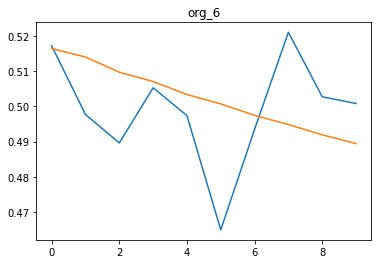

In [315]:
# LSTM 한 DATA set은 2, 1과 13의 close
plt.plot(test_data[:,0])
plt.plot(predicted_values)
plt.title(target)

In [316]:
mae = tf.keras.metrics.mean_absolute_error(test_data[:,0], predicted_values)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.013290155>

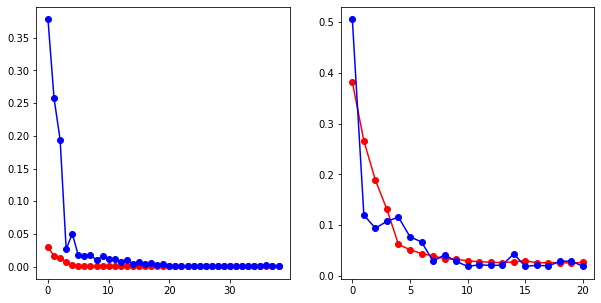

In [317]:
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(loss1, 'ro-')
plt.plot(val_loss1, 'bo-')

plt.subplot(122)
plt.plot(loss2, 'ro-')
plt.plot(val_loss2, 'bo-')

plt.show()